In [ ]:
pip install konlpy

     |████████████████████████████████| 19.4 MB 78.1 MB/s 
     |████████████████████████████████| 86 kB 6.7 MB/s 
     |████████████████████████████████| 448 kB 71.3 MB/s 
  Attempting uninstall: beautifulsoup4
    Found existing installation: beautifulsoup4 4.6.3
    Uninstalling beautifulsoup4-4.6.3:
      Successfully uninstalled beautifulsoup4-4.6.3


# 데이터 로드

In [ ]:
# 필요 프레임워크 및 라이브러리 준비
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import re
import urllib.request
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [ ]:
%cd /content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset

/content/drive/MyDrive/Colab Notebooks/NLP_Classification/sentiment/Cleaned Dataset


In [ ]:
# 데이터 다운 로드
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_train.txt", filename="ratings_train.txt")
urllib.request.urlretrieve("https://raw.githubusercontent.com/e9t/nsmc/master/ratings_test.txt", filename="ratings_test.txt")

('ratings_test.txt', <http.client.HTTPMessage at 0x7ff550c39090>)

In [ ]:
# 판다스로 각 파일데이터를  train/test 변수에 바인딩
train_data = pd.read_table('ratings_train.txt')
test_data = pd.read_table('ratings_test.txt')

In [ ]:
# 변수에 바인딩된 데이터 개수 확인
print('훈련용 리뷰 개수 :',len(train_data)) # 훈련용 리뷰 개수 출력
print('테스트용 리뷰 개수 :',len(test_data))

훈련용 리뷰 개수 : 150000
테스트용 리뷰 개수 : 50000


In [ ]:
# 훈련 데이터 내용 확인
train_data[:] # 상위 5개 출력

,id,document,label
0,9976970,아 더빙.. 진짜 짜증나네요 목소리,0
1,3819312,흠...포스터보고 초딩영화줄....오버연기조차 가볍지 않구나,1
2,10265843,너무재밓었다그래서보는것을추천한다,0
3,9045019,교도소 이야기구먼 ..솔직히 재미는 없다..평점 조정,0
4,6483659,사이몬페그의 익살스런 연기가 돋보였던 영화!스파이더맨에서 늙어보이기만 했던 커스틴 ...,1
...,...,...,...
149995,6222902,인간이 문제지.. 소는 뭔죄인가..,0
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1


In [ ]:
# 테스트 데이터 내용 확인
test_data[:] # 상위 5개 출력

,id,document,label
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0
...,...,...,...
49995,4608761,오랜만에 평점 로긴했네ㅋㅋ 킹왕짱 쌈뽕한 영화를 만났습니다 강렬하게 육쾌함,1
49996,5308387,의지 박약들이나 하는거다 탈영은 일단 주인공 김대희 닮았고 이등병 찐따 OOOO,0
49997,9072549,그림도 좋고 완성도도 높았지만... 보는 내내 불안하게 만든다,0
49998,5802125,절대 봐서는 안 될 영화.. 재미도 없고 기분만 잡치고.. 한 세트장에서 다 해먹네,0


In [ ]:
 # 데이터 통합
total_data = pd.concat([train_data, test_data])
print('통합 데이터 개수 :',len(total_data))

통합 데이터 개수 : 200000


In [ ]:
# 통합 데이터 확인
total_data[149996:150005]

,id,document,label
149996,8549745,평점이 너무 낮아서...,1
149997,9311800,이게 뭐요? 한국인은 거들먹거리고 필리핀 혼혈은 착하다?,0
149998,2376369,청춘 영화의 최고봉.방황과 우울했던 날들의 자화상,1
149999,9619869,한국 영화 최초로 수간하는 내용이 담긴 영화,0
0,6270596,굳 ㅋ,1
1,9274899,GDNTOPCLASSINTHECLUB,0
2,8544678,뭐야 이 평점들은.... 나쁘진 않지만 10점 짜리는 더더욱 아니잖아,0
3,6825595,지루하지는 않은데 완전 막장임... 돈주고 보기에는....,0
4,6723715,3D만 아니었어도 별 다섯 개 줬을텐데.. 왜 3D로 나와서 제 심기를 불편하게 하죠??,0


In [ ]:
 # shuffling하고 index reset
total_data = total_data.sample(frac=1).reset_index(drop=True) 

In [ ]:
# 셔플한 통합 데이터 확인
total_data[149996:150005]

,id,document,label
149996,8952299,재미도 미확인 내용도 미확인 결말도 미확인 연출도 미확인 공포도 미확인 5미확인의 ...,0
149997,5864319,브루스 윌리스는 줄곧 하향세를 걷더라.,0
149998,10181839,점수가 너무 너무 너무 높다.,0
149999,6376384,좋은 강연을 해주서서 고맙습니다,1
150000,2329383,남자가 보면 부럽다란 말 밖에 할말이 없음....재밌네,1
150001,5209393,왜 이런 영화가 8.67이나 되는건지..원.. 라스트갓파더가 훨남,0
150002,3738692,코미디영화지만 관객이 웃음을 찾아내야하는 어려운 영화.,0
150003,7379542,아 정말 긴장감도안생기고.. 무섭지도않고 놀라는것도없는 진부한스토리만 채운영화같음....,0
150004,9396173,별 마이너스는없나여?무슨 이런.. 말이된다안된다를 떠나서...도대체가 의도하고자 하...,0


# 데이터 클렌징

In [ ]:
# 중복 데이터 체크
total_data['document'].nunique(), total_data['label'].nunique()

(194543, 2)

In [ ]:
# 중복 데이터 제거
total_data.drop_duplicates(subset=['document'], inplace=True) # document 열에서 중복인 내용이 있다면 중복 제거

In [ ]:
# 중복 샘플 제거 확인
print('총 샘플의 수 :',len(total_data))

총 샘플의 수 : 194544


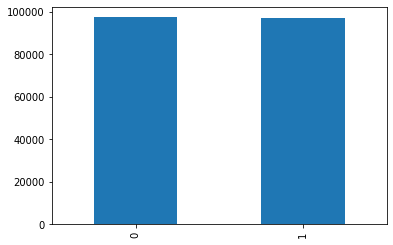

In [ ]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')

In [ ]:
# 균일해보이지만 정확하게 몇개인지 확인해보자
print(total_data.groupby('label').size().reset_index(name = 'count'))

   label  count
0      0  97380
1      1  97164


In [ ]:
# 0이 근소하게 많음, Null값이 있는지 체크해보자
print(total_data.isnull().values.any())

True


In [ ]:
# 어느 열에 null값이 존재하는지 확인
print(total_data.isnull().sum())

id          0
document    1
label       0
dtype: int64


In [ ]:
# null값 데이터가 어느 인덱스 위치에 존재하는지 출력
total_data.loc[total_data.document.isnull()]

,id,document,label
54829,5026896,NaN,0


In [ ]:
# Null 값 제거
total_data = total_data.dropna(how = 'any') # Null 값이 존재하는 행 제거
print(total_data.isnull().values.any()) # Null 값이 존재하는지 확인

False


In [ ]:
# null데이터 제거된 샘플 개수 확인
print(len(total_data))

194543


# 데이터 정규화

In [ ]:
# 훈련데이터에 한글과 공백을 제외하고 모두 제거해보자
total_data['document'] = total_data['document'].str.replace("[^ㄱ-ㅎㅏ-ㅣ가-힣 ]","")
total_data[:5]

,id,document,label
0,9342063,명작은 이런 영화를 보고 말하는것이다 문고리를 잡고 열듯말듯 고민하는 그 장면의 연...,1
1,1091112,매트릭스의 기본 골격을 이루고 있다,1
2,5856518,평점 왤캐높지 역대에 이것보다 쓰레기인 드라마 있었음내용이 모두최악,0
3,6246374,그냥 최고의 드라마 그냥 보세요ㅠㅠ,1
4,8724889,주인공두 ㅄ같구 설정도 병맛임 그냥 잔인한거 좋아하면 볼만할지도그렇다고 잔인한게 많...,0


In [ ]:
# 공백만 남은 데이터를 넓값으로 바꾸고 개수를 체크하자
total_data['document'] = total_data['document'].str.replace('^ +', "") # white space 데이터를 empty value로 변경
total_data['document'].replace('', np.nan, inplace=True)
print(total_data.isnull().sum())

id             0
document    1025
label          0
dtype: int64


In [ ]:
# null값 행 출력
total_data.loc[total_data.document.isnull()][:5]

,id,document,label
171,106419,NaN,1
195,9624869,NaN,1
286,7577383,NaN,1
390,3261415,NaN,1
450,5065636,NaN,1


In [ ]:
# null값 데이터 제거
total_data = total_data.dropna(how = 'any')
print(len(total_data))

193518


   label  count
0      0  96997
1      1  96521


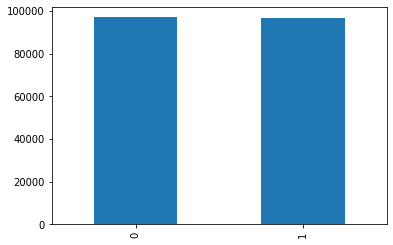

In [ ]:
# 훈련 데이터에서의 레이블 값의 분포 확인
total_data['label'].value_counts().plot(kind = 'bar')
print(total_data.groupby('label').size().reset_index(name = 'count'))

# 정제&정규화한 데이터 파일로 저장

In [ ]:
total_data.to_csv('naver_movie_review_total_data.txt', index=False, sep='\t')

NameError: ignored

# 문장단위 자모 분리

In [ ]:
total_data = pd.read_table('clean_naver_movie_review_total_data.txt')

In [ ]:
okt = Okt()
stopwords = ['의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

In [ ]:
pip install jamo

In [ ]:
from jamo import h2j, j2hcj

In [ ]:
# 문장단위 자모 분리
X_train_jamo = []
for sentence in total_data['document']:
    temp_X_jamo = j2hcj(h2j(sentence))
    X_train_jamo.append(temp_X_jamo)
print(len(X_train_jamo))
X_train_jamo[:3]

193518


['ㅊㅚㅇㅠㄴㅇㅕㅇㅇㅣ ㅁㅐㄹㅕㄱㅇㅣㅆㄱㅔ ㄴㅏㅇㅘㅆㄴㅔ', 'ㄴ', 'ㅊㅗㅅㅏㅇㅣㅇㅓㅇㅣㄴㅇㅣ ㄷㅚㄴ ㅎㅗㅇㄱㅣㄹㄷㅗㅇ']

In [ ]:
# 문장단위 자모 파일 저장
import json
json = json.dumps(X_train_jamo, ensure_ascii=False)
jamo1 = open("naver_movie_review_total_data_jamo1(sentence).json", "w", encoding="utf-8")
jamo1 .write(json)
jamo1 .close()

In [ ]:
# 문장단위 자모 파일 로드
import json
with open('naver_movie_review_total_data_jamo1(sentence).json', encoding='UTF8') as json_file:
    X_train_j1 = json.load(json_file)

In [ ]:
print(len(X_train_j1))
X_train_j1[:3]

193518


['ㅊㅚㅇㅠㄴㅇㅕㅇㅇㅣ ㅁㅐㄹㅕㄱㅇㅣㅆㄱㅔ ㄴㅏㅇㅘㅆㄴㅔ', 'ㄴ', 'ㅊㅗㅅㅏㅇㅣㅇㅓㅇㅣㄴㅇㅣ ㄷㅚㄴ ㅎㅗㅇㄱㅣㄹㄷㅗㅇ']

In [ ]:
tokenizer_j1 = Tokenizer()
tokenizer_j1.fit_on_texts(X_train_j1)
print(len(tokenizer_j1.word_index))
tokenizer_j1.word_index

374885


{'ㅇㅕㅇㅎㅘ': 1,
 'ㄴㅓㅁㅜ': 2,
 'ㅈㅓㅇㅁㅏㄹ': 3,
 'ㅈㅣㄴㅉㅏ': 4,
 'ㅇㅣ': 5,
 'ㅇㅙ': 6,
 'ㄱㅡㄴㅑㅇ': 7,
 'ㄷㅓ': 8,
 'ㅇㅣㄹㅓㄴ': 9,
 'ㅅㅜ': 10,
 'ㅇㅕㅇㅎㅘㄹㅡㄹ': 11,
 'ㅈㅓㅁ': 12,
 'ㄷㅏ': 13,
 'ㅈㅏㄹ': 14,
 'ㅂㅗㄱㅗ': 15,
 'ㅈㅗㅁ': 16,
 'ㅇㅕㅇㅎㅘㄴㅡㄴ': 17,
 'ㄱㅡ': 18,
 'ㅇㅕㅇㅎㅘㄱㅏ': 19,
 'ㅂㅗㄴ': 20,
 'ㅊㅚㄱㅗㅇㅢ': 21,
 'ㅂㅘㅆㄴㅡㄴㄷㅔ': 22,
 'ㄴㅐㄱㅏ': 23,
 'ㅋㅋ': 24,
 'ㅇㅓㅄㄴㅡㄴ': 25,
 'ㅇㅣㄱㅓㄴ': 26,
 'ㅇㅓㅄㄷㅏ': 27,
 'ㄷㅡㄹㅏㅁㅏ': 28,
 'ㅇㅣㄹㅓㅎㄱㅔ': 29,
 'ㅍㅕㅇㅈㅓㅁ': 30,
 'ㅇㅣㄱㅓ': 31,
 'ㅇㅘㄴㅈㅓㄴ': 32,
 'ㅇㅣㅆㄴㅡㄴ': 33,
 'ㅇㅣㄱㅔ': 34,
 'ㅊㅏㅁ': 35,
 'ㅈㅗㅎㅇㅡㄴ': 36,
 'ㅇㅏ': 37,
 'ㅍㅕㅇㅈㅓㅁㅇㅣ': 38,
 'ㄷㅏㅅㅣ': 39,
 'ㅂㅗㄴㅡㄴ': 40,
 'ㅇㅕㄴㄱㅣ': 41,
 'ㄴㅐ': 42,
 'ㄱㅡㄹㅣㄱㅗ': 43,
 'ㅇㅕㄱㅅㅣ': 44,
 'ㅁㅏㄶㅇㅣ': 45,
 'ㄱㅓㅅ': 46,
 'ㄴㅏㄴ': 47,
 'ㅅㅡㅌㅗㄹㅣ': 48,
 'ㅎㅏㄴ': 49,
 'ㅆㅡㄹㅔㄱㅣ': 50,
 'ㅈㅐㅁㅣㅆㄱㅔ': 51,
 'ㅊㅚㄱㅗ': 52,
 'ㅎㅏㄴㅡㄴ': 53,
 'ㅇㅓㅄㄱㅗ': 54,
 'ㄸㅗ': 55,
 'ㅂㅗㅁㅕㄴ': 56,
 'ㄲㅗㄱ': 57,
 'ㅠㅠ': 58,
 'ㄱㅏㅈㅏㅇ': 59,
 'ㅋㅋㅋ': 60,
 'ㅁㅏㅈㅣㅁㅏㄱ': 61,
 'ㅇㅕㅇㅎㅘㄷㅏ': 62,
 'ㅇㅏㄲㅏㅂㄷㅏ': 63,
 'ㅡㅡ': 64,
 'ㅁㅜㅅㅡㄴ': 65,
 'ㄱㅏㅌㅇㅡㄴ': 66,
 'ㅁㅝ': 67,
 'ㅋ': 68,
 'ㅂㅗㄹ': 69,
 'ㅎㅏㅈㅣㅁㅏㄴ': 70,
 'ㅈㅏㄱㅍㅜㅁ': 71,
 'ㄲㅡㅌㄲㅏㅈㅣ': 72,
 'ㅁㅏㄴㄷㅡㄴ': 73,
 'ㅇㅏㄴ': 74,
 'ㄷㅐㅎ

In [ ]:
# indexed_vocab(vocab) 저장
indexed_vocab = tokenizer_j1.word_index
import json
json = json.dumps(indexed_vocab, ensure_ascii=False)
vacab = open("naver_movie_review_total_data_jamo1(sentence)_indexed_vocab.json", "w", encoding="utf-8")
vacab.write(json)
vacab.close()

In [ ]:
threshold = 2
total_cnt = len(tokenizer_j1.word_index) # 단어의 수
rare_cnt = 0 # 등장 빈도수가 threshold보다 작은 단어의 개수를 카운트
total_freq = 0 # 훈련 데이터의 전체 단어 빈도수 총 합
rare_freq = 0 # 등장 빈도수가 threshold보다 작은 단어의 등장 빈도수의 총 합

# 단어와 빈도수의 쌍(pair)을 key와 value로 받는다.
for key, value in tokenizer_j1.word_counts.items():
    total_freq = total_freq + value

    # 단어의 등장 빈도수가 threshold보다 작으면
    if(value < threshold):
        rare_cnt = rare_cnt + 1
        rare_freq = rare_freq + value

print('단어 집합(vocabulary)의 크기 :',total_cnt)
print('등장 빈도가 %s번 이하인 희귀 단어의 수: %s'%(threshold - 1, rare_cnt))
print("단어 집합에서 희귀 단어의 비율:", (rare_cnt / total_cnt)*100)
print("전체 등장 빈도에서 희귀 단어 등장 빈도 비율:", (rare_freq / total_freq)*100)

단어 집합(vocabulary)의 크기 : 374885
등장 빈도가 1번 이하인 희귀 단어의 수: 290443
단어 집합에서 희귀 단어의 비율: 77.47522573589234
전체 등장 빈도에서 희귀 단어 등장 빈도 비율: 19.48139145226223


In [ ]:
# 0번 패딩 토큰과 1번 OOV 토큰을 고려하여 +2
vocab_size = total_cnt - rare_cnt + 2
print('단어 집합의 크기 :',vocab_size)

단어 집합의 크기 : 84444


In [ ]:
tokenizer_j1 = Tokenizer(vocab_size, oov_token = 'OOV') 
tokenizer_j1.fit_on_texts(X_train_j1)
X_train_j1 = tokenizer_j1.texts_to_sequences(X_train_j1)
print(len(X_train_j1))
X_train_j1[:3]

193518


[[1, 21182, 9500], [11626], [1, 248, 16499]]

In [ ]:
y_train = np.array(total_data['label'])

In [95]:
print(len(X_train_j1))
X_train_j1[:3]

193518


array([[    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     1, 21182,  9500],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0, 11626],
       [    0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     0,     0,     0,     0,     0,
            0,     0,     0,     0,     1,   248, 16499]], dtype=int32)

# 패딩

리뷰 최대 길이 : 42
리뷰 평균 길이 : 7.704058537190339


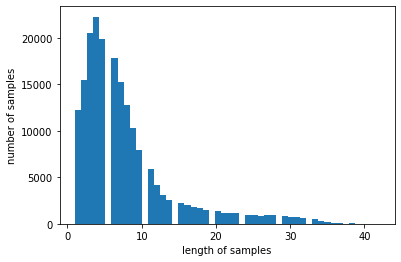

In [ ]:
print('리뷰 최대 길이 :',max(len(l) for l in X_train_j1))
print('리뷰 평균 길이 :',sum(map(len, X_train_j1))/len(X_train_j1))
plt.hist([len(s) for s in X_train_j1], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [ ]:
def below_threshold_len(max_len, nested_list):
  cnt = 0
  for s in nested_list:
    if(len(s) <= max_len):
        cnt = cnt + 1
  print('전체 샘플 중 길이가 %s 이하인 샘플의 비율: %s'%(max_len, (cnt / len(nested_list))*100))

In [ ]:
max_len = 25
below_threshold_len(max_len, X_train_j1)

전체 샘플 중 길이가 25 이하인 샘플의 비율: 96.38121518411724


In [ ]:
X_train_j1[:3]

[[1, 21182, 9500], [11626], [1, 248, 16499]]

In [ ]:
y_train[:3]

array([0, 1, 0])

# LSTM으로 모델 만들기

In [ ]:
from tensorflow.keras.layers import Embedding, Dense, LSTM
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

In [ ]:
# 필요한 매트릭 선언, AUC-ROC, F1-Score, AUC-PR 에 필요한 지표 모두 체크
import tensorflow as tf

ROCauc = tf.keras.metrics.AUC(curve="ROC") # auc_1
PRauc = tf.keras.metrics.AUC(curve="PR") # auc_2
RECALL = tf.keras.metrics.Recall()
PRECISION = tf.keras.metrics.Precision()
TP = tf.keras.metrics.TruePositives()
TN = tf.keras.metrics.TrueNegatives()
FP = tf.keras.metrics.FalsePositives()
FN = tf.keras.metrics.FalseNegatives()

In [ ]:
model = Sequential()
model.add(Embedding(vocab_size, 100))
model.add(LSTM(128))
model.add(Dense(1, activation='sigmoid'))

In [ ]:
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=4)
mc = ModelCheckpoint('jamo(sentence)_test.h5', monitor='val_acc', mode='max', verbose=1, save_best_only=True)

In [ ]:
model.compile(optimizer='rmsprop', loss='binary_crossentropy', metrics=['acc', ROCauc, PRauc, TP, TN, FP, FN])

In [ ]:
history = model.fit(X_train_j1, y_train, epochs=15, callbacks=[es, mc], batch_size=30, validation_split=0.2)

# 형태소단위 자모 분리

In [ ]:
# 형태소단위 자모 분리
X_train_j2 = []
for sentence in total_data['document']:
    temp_X_j2 = okt.morphs(sentence, stem=True) # 토큰화
    temp_X_j2 = [word for word in temp_X_j2 if not word in stopwords] # 불용어 제거
    for word in temp_X_j2:
        temp_X_j2 = j2hcj(h2j(word)) # 자모 분리 
    X_train_j2.append(temp_X_j2)

print(len(X_train_j2))
X_train_j2[:3]

In [ ]:
# 형태소단위 자모 저장
import json
json = json.dumps(X_train_j2, ensure_ascii=False)
jamo2 = open("naver_movie_review_total_data_jamo2(tokened).json", "w", encoding="utf-8")
jamo2 .write(json)
jamo2 .close()

In [ ]:
# 형태소단위 자모 로드
import json
with open('naver_movie_review_total_data_jamo2(tokened).json', encoding='UTF8') as json_file:
    X_train_j2 = json.load(json_file)
print(len(X_train_j2))
X_train_j2[:3]

In [ ]:
tokenizer_j2 = Tokenizer()
tokenizer_j2.fit_on_texts(X_train_j2)
print(len(tokenizer_j2.word_index))
tokenizer_j2.word_index